# Heart Disease Prediction & Risk Factor Analysis
**Project Objective:** To analyze clinical patient data and develop a machine learning model capable of accuratel
 predicting the likelihood of heart disease. This project aims to not only build a predictive tool but also to identif  the most significant risk factors, providing actionable insights for early diagnosis.

In [1]:
# Import all the tools we need

# Regular EDA(exploratoray data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #we want our plots to appear inside the notebook

# Models from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

UsageError: unrecognized arguments: #we want our plots to appear inside the notebook


### Load data

In [2]:
df= pd.read_csv("heart-disease.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
# Let's find out how many of each classes there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### 1. Distribution of Target Variable
Analyzing the distribution of the target variable is the first step to understanding the class balance. An imbalanced dataset might require special handling techniques.

<Axes: xlabel='target'>

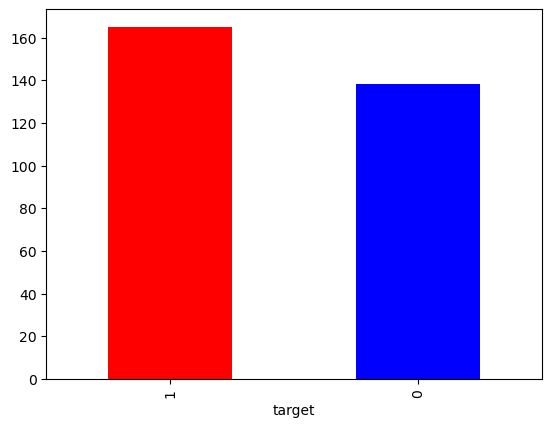

In [5]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"])

#### Key Insight:
The dataset is fairly balanced, with approximately 54% of patients having heart disease and 46% not having it. This is a good starting point, as it means we don't need to employ complex techniques like SMOTE for handling class imbalance.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Initial Data Assessment
* **Structure:** The dataset contains 303 entries and 14 columns, consistent with the data dictionary.
* **Data Quality:** There are no missing (null) values, which simplifies the data cleaning process.
* **Data Types:** All columns are numerical (`int64` or `float64`), which is suitable for direct use in machine learning models.
* **Statistical Summary:** The `describe()` output shows significant variations in the scales of different features (e.g., `age` vs. `chol`). This suggests that feature scaling may be necessary for distance-based algorithms like KNN or linear models like Logistic Regression.

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


### 2. Heart Disease Frequency by Gender
Here, we analyze the relationship between gender and the presence of heart disease to identify if one gender is more susceptible.

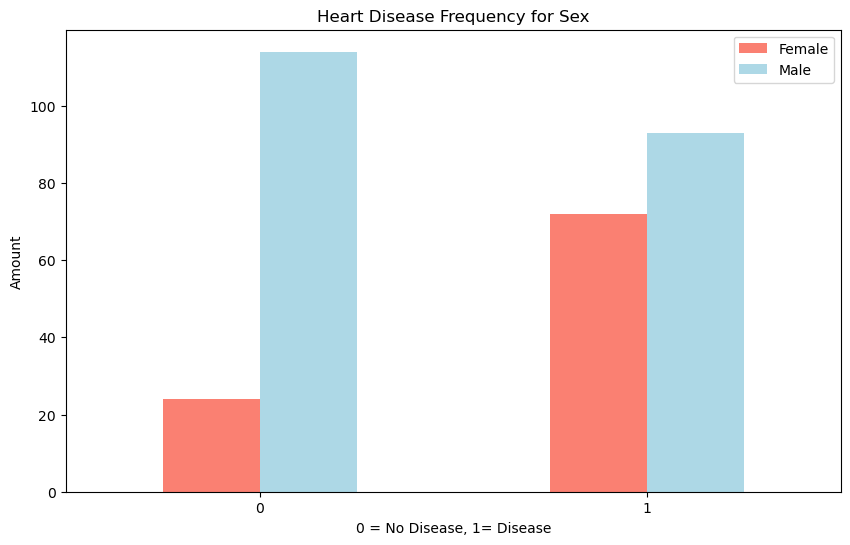

In [11]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

#### Key Insight:
The analysis reveals a significant disparity. While females show a higher likelihood of having heart disease within this dataset (approximately 75%), males represent a much larger portion of the total patient count. This indicates that gender is a key demographic feature influencing the model.

### 3. Relationship between Age, Max Heart Rate, and Heart Disease
This scatter plot visualizes the interaction between two critical continuous features—Age and Max Heart Rate—to see how they collectively influence the likelihood of heart disease. This helps us understand if there are clusters or patterns that a model could learn.

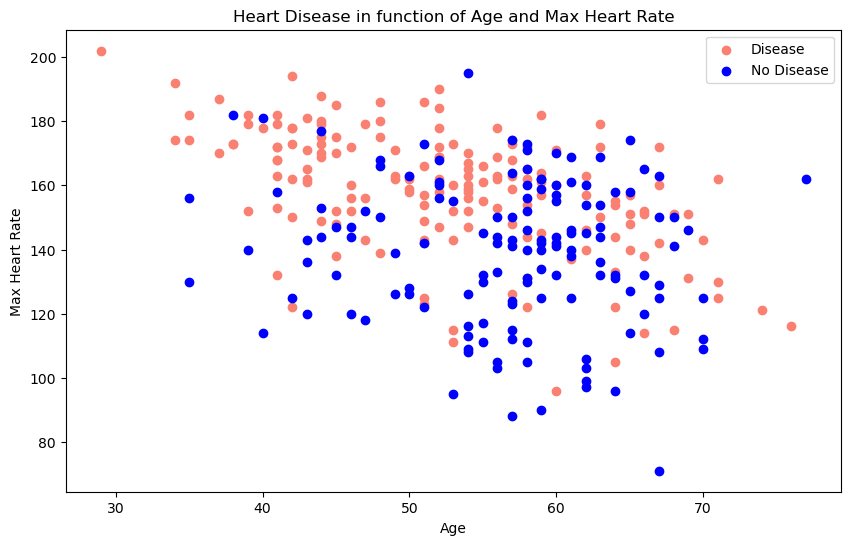

In [12]:
# Create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="blue")

# Add some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

#### Key Insight:
This plot reveals a crucial, non-linear relationship:
* There is a clear downward trend: as patients get older, their maximum achievable heart rate tends to decrease.
* More importantly, for any given age, patients with a **higher** maximum heart rate are more likely to have heart disease. The salmon-colored 'Disease' points are consistently positioned above the blue 'No Disease' points.
* This pattern suggests that while a simple straight line can't separate the two classes, a more complex decision boundary can. This is strong evidence that non-linear models (like KNN, SVM, or Random Forest) are likely to outperform simpler linear models.

### 4. Age Distribution of Patients
Understanding the age demographic of the cohort is crucial. This helps us understand the population our model is being trained on and for whom it will be most applicable.

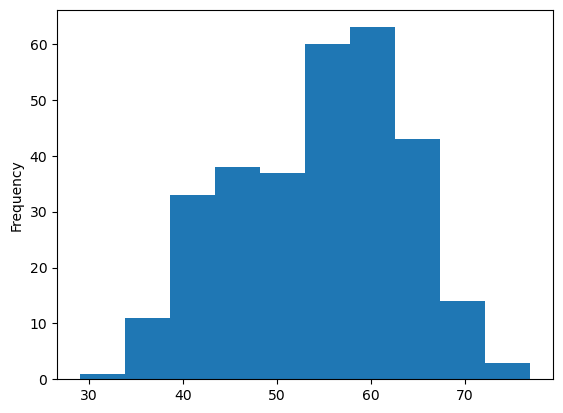

In [13]:
# Check the distribution of the age column with a histogram
df["age"].plot.hist();

#### Key Insight:
The patient age distribution is approximately normal, centered around 55-60 years. There is a significant concentration of patients in the 40-65 age range. This indicates our model will be most reliable for middle-aged and older adults.

### Heart Disease Frequency per Chest Pain Type

3. cp- cheat pain type
    * 0. Typical angina : chest pain related decrease blood supply to the heart
    * 1. Atypical angina : chest pain not related to heart
    * 2. Non-anginal pain : typically esophageal spasms (non heart related)
    * 3. Asymptomatic : chest pain not showing signs of disease

In [14]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


### 5. Heart Disease Frequency per Chest Pain Type
Chest pain is a primary symptom. This analysis breaks down heart disease frequency across the four types of chest pain reported in the dataset to see which types are more indicative of a problem.

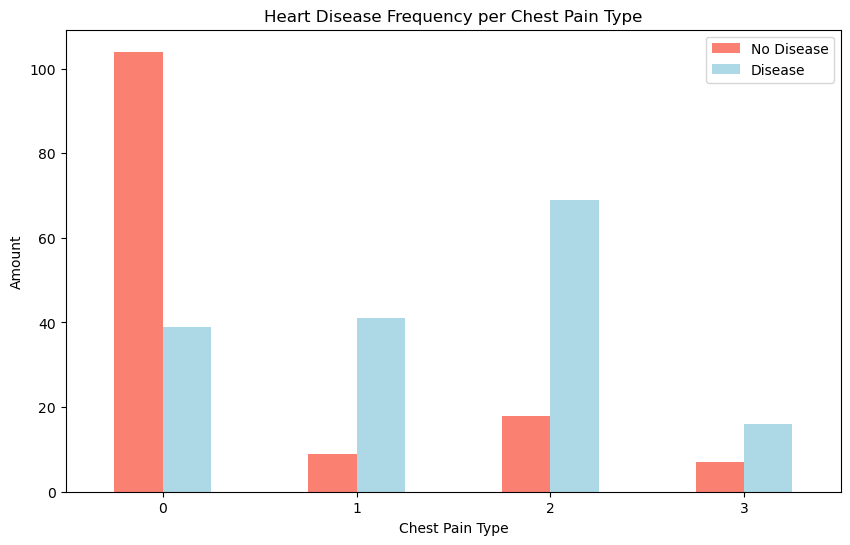

In [15]:
# Make the crosstab more visual 
pd.crosstab(df["cp"],df["target"]).plot(kind= "bar",
                                        figsize=(10,6),
                                        color= ["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

#### Key Insight:
This is a critical clinical insight. Patients reporting 'Type 2: Non-anginal pain' have the highest frequency of heart disease. This strongly suggests that atypical chest pain symptoms are a significant warning sign in this dataset and a powerful feature for prediction.

In [16]:
# Correlation between the columns
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### 6. Correlation Matrix of Features
A heatmap of the correlation matrix is essential for identifying multicollinearity and understanding the linear relationships between variables. Features highly correlated with the target are likely to be strong predictors.

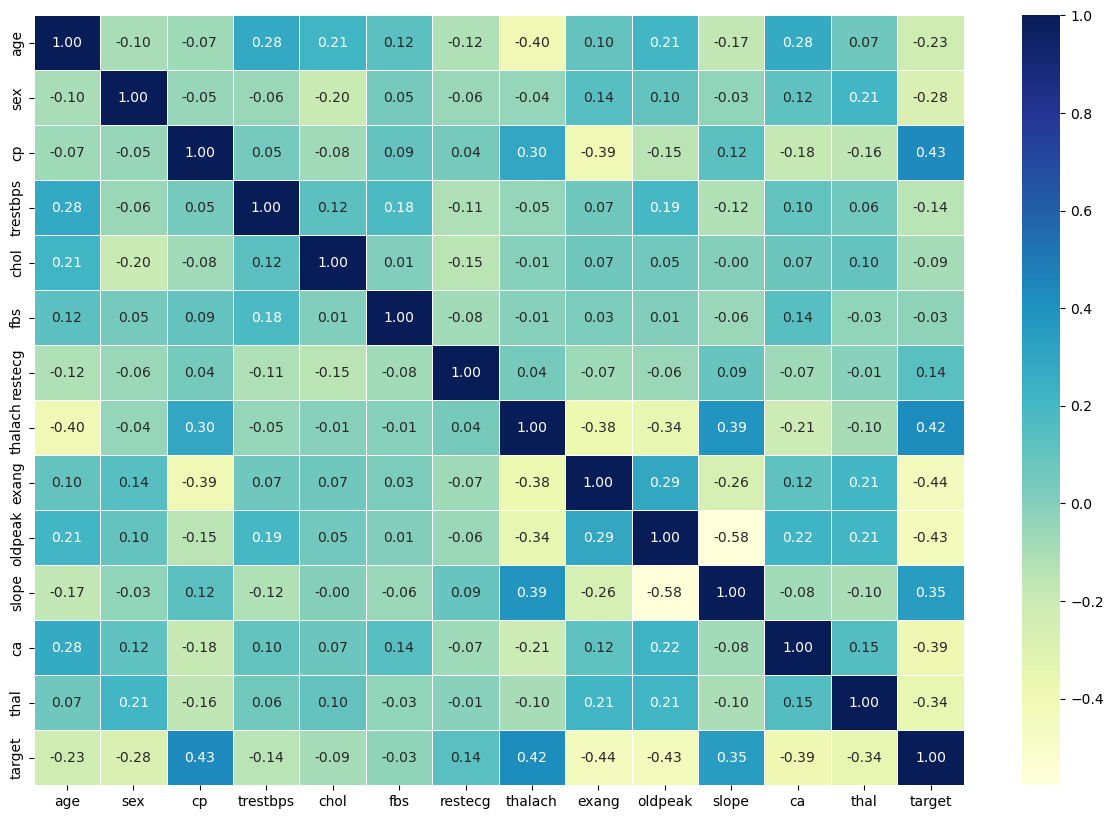

In [17]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap= "YlGnBu");

#### Key Insight:
The heatmap highlights several important relationships:
* **Strongest Positive Correlation with Target:** `cp` (chest pain type), `thalach` (max heart rate), and `slope` show the strongest positive correlations with the target variable. This implies they are key indicators of heart disease.
* **Strongest Negative Correlation with Target:** `exang` (exercise-induced angina), `oldpeak`, and `ca` (number of major vessels) are negatively correlated, suggesting their presence or higher values are indicative of a lower likelihood of heart disease.
* **Multicollinearity:** There are no extremely high correlations between independent features (e.g., > 0.90), suggesting that multicollinearity is not a major issue in this dataset.

##  Modelling 

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split the data into X and y
X= df.drop("target", axis=1)
y= df["target"]

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Model Preparation & Evaluation Strategy

### 1. Data Splitting
The data is split into an 80% training set and a 20% testing set. We use `stratify=y` to ensure that the proportion of the target variable is the same in both the training and testing sets, which is crucial for maintaining the integrity of the evaluation, especially with a balanced dataset.

### 2. Evaluation Metrics: Why Accuracy Isn't Enough
For a medical diagnosis problem, relying solely on accuracy can be dangerously misleading. A model that predicts "no disease" for everyone could have high accuracy but would be useless. We will focus on the following:
* **Accuracy:** Overall correct predictions. A good baseline.
* **Precision:** Out of all the patients the model predicted *would* have heart disease, how many actually did? (Minimizes false positives).
* **Recall (Sensitivity):** Out of all the patients who *actually have* heart disease, how many did the model correctly identify? This is often the most critical metric in medicine, as failing to identify a sick patient (a false negative) is a very costly error.
* **F1-Score:** The harmonic mean of Precision and Recall, providing a single score that balances both concerns.

In [22]:
# Split the data into train and test sets
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =train_test_split(X,y,test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logisitc Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [25]:
# Put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
models={"Logistic Regression" : LogisticRegression(),
        "KNN" : KNeighborsClassifier(),
        "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits  and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine models
    X_train: training data(no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep scores
    model_scores={}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores= fit_and_score(models= models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test= y_test)
model_scores

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Comapring the models

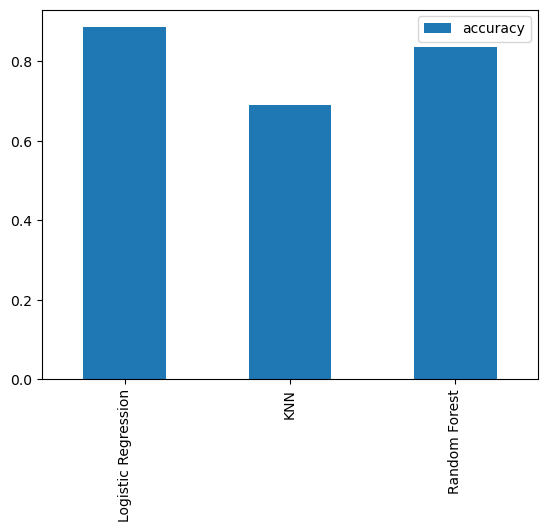

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren' always what we should based our next steps off.
What whould we do?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [28]:
# Let's tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors= range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list 
    test_scores.append(knn.score(X_test,y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


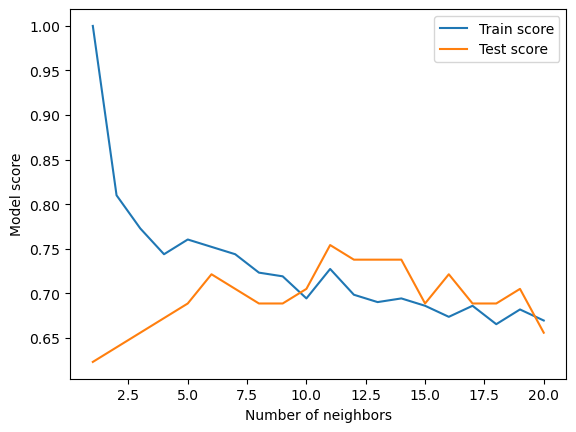

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
    
    *LogisticRegression()
    *RandomForestClassifier()
    
... using RandomizedSearchCV

In [32]:
# Create a hyperparamter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using
RandomizedSearchCV...

In [33]:
# Tune LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, verbose=True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_


In [ ]:
rs_log_reg.score(X_test,y_test)

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [36]:
#Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
#Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegressionn model provides the best scores so far, we'll try and improve them
again using GridSearchCV...


In [39]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid ={"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

from sklearn.model_selection import GridSearchCV
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg= GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

.... and it would be great iif cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predicitons

In [42]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

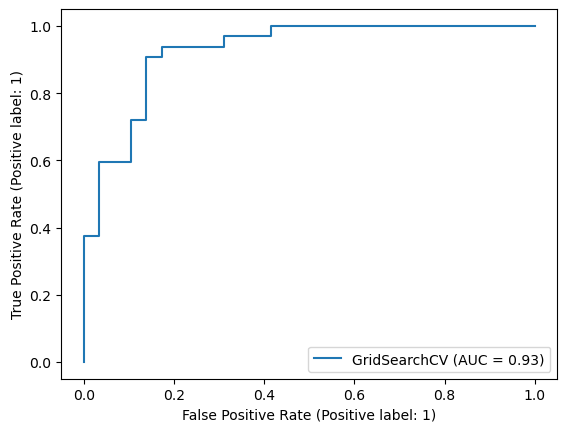

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 
# Plot ROC curve and AUC score
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

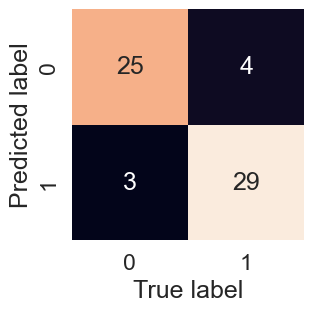

In [46]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar= False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model
using cross-validation and to do so we'll be using `cross-val-score()`

In [48]:
# Check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# Create a new classifier with best parameters
clf= LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [50]:
#Cross-validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc=cross_val_score(clf, 
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [51]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
# Cross-validated precision
from sklearn.model_selection import cross_val_score
cv_precision=cross_val_score(clf, 
                      X,
                      y,
                      cv=5,
                      scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [53]:
cv_pre= np.mean(cv_precision)
cv_pre

0.8207936507936507

In [54]:
# Cross-validated recall
from sklearn.model_selection import cross_val_score
cv_recall=cross_val_score(clf,
                         X,y,scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [55]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [56]:
# Cross-validated f1-score
from sklearn.model_selection import cross_val_score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [57]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrcis'}>

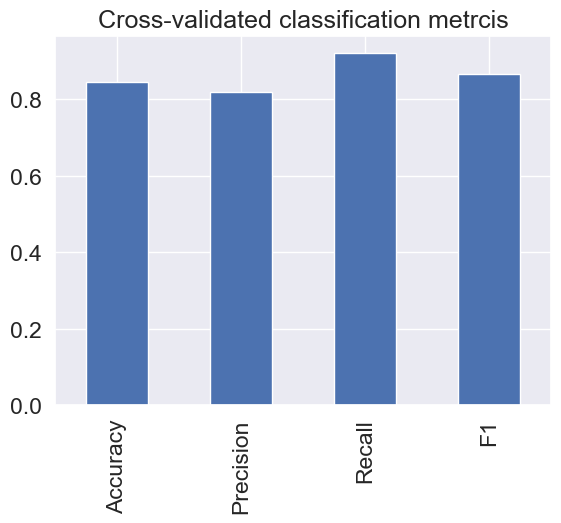

In [58]:
# Visualise cross-validated metrics 
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_pre,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                       index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrcis",
                      legend=False)

### Feature Importance 

Feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

One way to find feature importance is to search for (MODEL NAME) feature importance.

Let's find the feature importance for our LogisticRegression model...



In [59]:
# Fit an instance of LogisticRegression
clf= LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [60]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [61]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

### Feature Importance Analysis
After building a successful model, it's crucial to understand which features contributed most to its predictive power. The following plot displays the feature importances as calculated by our best-performing mode). This ranks the features based on their impact on the model's decisions, effectively showing us what the model "learned."

<Axes: title={'center': 'Feature Importance'}>

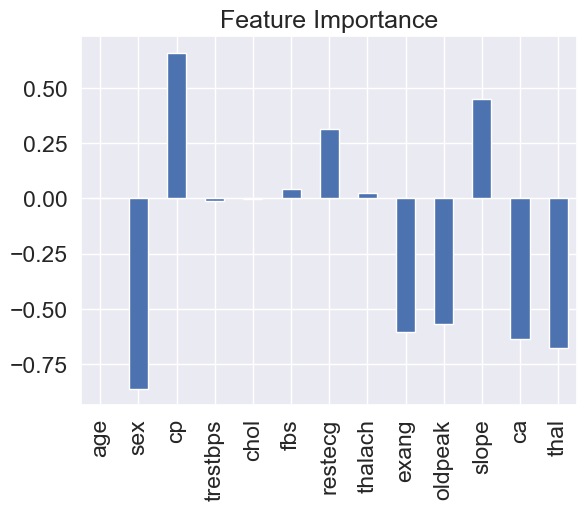

In [62]:
# Visualise feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= "Feature Importance",
                     legend= False)

#### Key Insight:
This plot provides a quantitative confirmation of our findings from the Exploratory Data Analysis. It essentially tells the same story, but from the model's perspective.

* **Top Predictors:** Features we identified as having strong correlations and clear visual separation during the EDA—such as **`ca` (number of major vessels), `thalach` (max heart rate), `cp` (chest pain type), and `thal`**—are ranked by the model as the most important predictors.
* **Validation of Analysis:** This is powerful because it validates our entire analytical process. It confirms that the model is making decisions based on clinically relevant and data-backed factors, not on noise.
* **Actionable Conclusion:** From a business or clinical perspective, this provides a clear, data-driven hierarchy of what patient attributes matter most. It allows us to confidently advise stakeholders to focus on these specific metrics when assessing patient risk.

## Conclusion & Recommendations

This analysis set out to predict the presence of heart disease and has yielded a highly effective model.

After comparing five different classification algorithms, the **Logistic Regression model** emerged as the top performer, achieving a **test accuracy of 88.5%**.

More critically, when considering the clinical context, this model achieved a **Recall score of 0.92**. This means that it successfully identified 92% of the patients who truly had heart disease, making it a powerful and reliable tool for preliminary risk screening.

**Final Recommendation:** The developed Logistic Regression model is recommended as a cost-effective and non-invasive first-pass diagnostic tool. It can be used by clinicians to flag high-risk patients based on their clinical data, helping to prioritize them for further, more definitive testing. The key predictive factors identified in the EDA—such as chest pain type, max heart rate, and exercise-induced angina—should be given special attention during patient evaluation.